# Cross-validation

### Importar liberías

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as st

from sklearn.model_selection import train_test_split

In [21]:
def sep():
    print("-"*100)

Visualizaremos a continuación cuatro distribuciones
1. Una distribución inicial la cual representaría la totalidad de los datos del mundo real.
2. Una distribución de datos extraídos. Estos datos son los datos que nosotros tenemos acceso del mundo real.
3. Una distribución de datos de entrenamiento. Datos que utilizamos para entrenar un modelo de Machine Learning. Estos podrían ser datos etiquetados (labeled data).
4. Una distribución de datos de testeo. Datos que utilizamos para evaluar un modelo de Machine Learning. Estos podrían ser datos no etiquetados (unlabeled data).

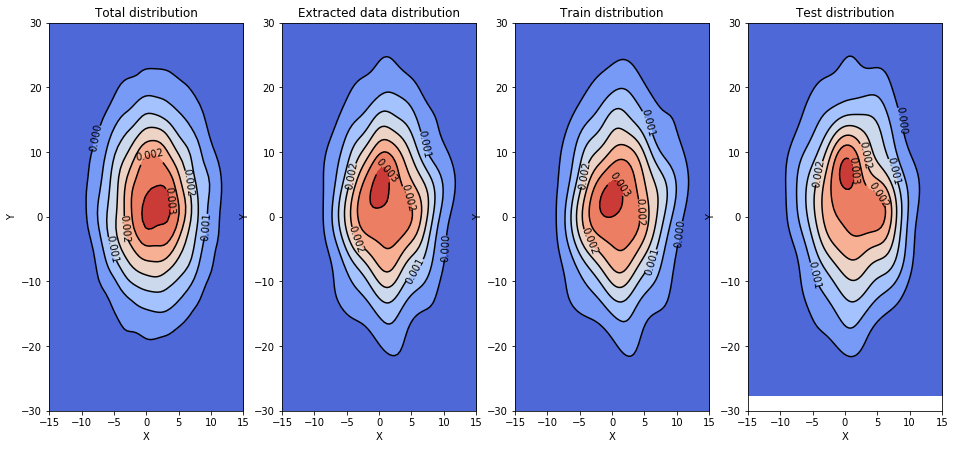

In [53]:
fig = plt.figure(figsize=(16,12))
def plot_grid(x,y, title, sub):
    # Define the borders
    deltaX = (max(x) - min(x))/10
    deltaY = (max(y) - min(y))/10
    xmin = min(x) - deltaX
    xmax = max(x) + deltaX
    ymin = min(y) - deltaY
    ymax = max(y) + deltaY
#     print(xmin, xmax, ymin, ymax)
    # Create meshgrid
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

#     ax = fig.gca()
    ax = fig.add_subplot(sub)
#     ax.set_xlim(xmin, xmax)
#     ax.set_ylim(ymin, ymax)
    ax.set_xlim(-15, 15)
    ax.set_ylim(-30, 30)
    cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
    ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.title(title)

    
n = 10000
x_total = np.random.normal(loc = 1, scale = 5, size = n)
y_total = np.random.normal(loc = 2, scale = 10, size = n)

x, x_unseen, y, y_unseen = train_test_split(
    x_total, y_total, test_size=0.9, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

plot_grid(x_total, y_total, "Total distribution", 141)
plot_grid(x, y, "Extracted data distribution",142)
plot_grid(X_train, y_train, "Train distribution", 143)
plot_grid(X_test, y_test, "Test distribution", 144)

- **Qué es lo mejor que podría pasar?**
> Que los datos de extraídos sean la mayor cantidad posible de manera que mi muestra de datos sea lo más parecida a la población total. Cuantos más datos obtengo más probable es que mi muestra sea más parecida o representativa de la población total. Esto de obtener una cantidad tan grande de datos que mi muestra sea absolutamente representativa de la realidad en la vida real casi no sucede.

- **Si cuantos más datos asigno a training más parecida será la distribución de training a la distribución de mis datos extraídos, por qué no todos mi datos los asigno a training?**
> Las razones de partir nuestro dataset en train/validation/test es:
 - poder tener un valor estimado de la performance que el modelo alcanzará en datos no vistos.
 - comparar performances relativas entre modelos.
 - incrementar la performance de nuestro modelo ajustando hiperparámetros.
 - otras.
> Entonces, una vez que hayamos alcanzado estos objetivos (haya obtenido una buena estimación, haya seleccionado el modelo y haya ajustado hiperparámetros) uno re-entrena el modelo final con el 100% de los datos.

### [GroupKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

Variante de iterador de K-fold con grupos que no se superponen.

Un mismo grupo no aparecerá en dos *folds* diferentes (el número de grupos distintos tiene que ser al menos igual al número de *folds*).

Los *folds* están aproximadamente equilibrados en el sentido de que el número de grupos distintos es aproximadamente el mismo en cada *fold*.

En este demo:
1. Cargaremos un CSV con un dataframe muy simple con el fin de ver como se crean conjuntos de entrenamiento y validación.
2. Importaremos la clase `GroupKFold` y crearemos una instancia de la misma.
3. Visualizaremos los conjuntos de entrenamiento y validación.

In [6]:
PATH = os.getcwd() + "/data/validation/"
df = pd.read_csv(PATH + "groupkfold.csv", sep=',')
df

,id,X,y
0,1,6,1
1,2,8,0
2,3,3,0
3,4,4,1
4,5,6,0
5,6,9,0
6,7,1,1
7,8,0,0
8,9,5,0
9,10,7,0


Utilizemos la clase [GroupKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html) de Scikit Learn para crear grupos no superpuestos. Al crear una instancia de la clase `GroupKFold` no creamos *folds* sino que creamos un iterador. Este iterador nos devuelve indices que podemos utilizar para dividir nuestro dataframe. Veamos la manera de realizarlo:

In [26]:
from sklearn.model_selection import GroupKFold

k = 5
group_fold = GroupKFold(n_splits = k)

length = len(df)

# Generate indices to split data into training and test set.
folds = group_fold.split(X = df["X"],
                         y = df["y"],
                         groups = df['id'].tolist())
folds

<generator object _BaseKFold.split at 0x7fca800a4040>

Una vez creado el iterador dividamos nuestro dataframe en los distintos *folds* y visualizemoslos:

In [27]:
i = 1

for fold, (train_index, valid_index) in enumerate(folds): 
    print(f"Fold {i}")
    print(f"Train index: {train_index}")
    print(f"Validation index: {valid_index}")
    print("Training dataset:")
    display(df.iloc[train_index])
    print("Validation dataset:")
    display(df.iloc[valid_index])
    sep()
    i+=1

Fold 1
Train index: [0 1 2 3 5 6 7 8]
Validation index: [4 9]
Training dataset:


,id,X,y
0,1,6,1
1,2,8,0
2,3,3,0
3,4,4,1
5,6,9,0
6,7,1,1
7,8,0,0
8,9,5,0


Validation dataset:


,id,X,y
4,5,6,0
9,10,7,0


----------------------------------------------------------------------------------------------------
Fold 2
Train index: [0 1 2 4 5 6 7 9]
Validation index: [3 8]
Training dataset:


,id,X,y
0,1,6,1
1,2,8,0
2,3,3,0
4,5,6,0
5,6,9,0
6,7,1,1
7,8,0,0
9,10,7,0


Validation dataset:


,id,X,y
3,4,4,1
8,9,5,0


----------------------------------------------------------------------------------------------------
Fold 3
Train index: [0 1 3 4 5 6 8 9]
Validation index: [2 7]
Training dataset:


,id,X,y
0,1,6,1
1,2,8,0
3,4,4,1
4,5,6,0
5,6,9,0
6,7,1,1
8,9,5,0
9,10,7,0


Validation dataset:


,id,X,y
2,3,3,0
7,8,0,0


----------------------------------------------------------------------------------------------------
Fold 4
Train index: [0 2 3 4 5 7 8 9]
Validation index: [1 6]
Training dataset:


,id,X,y
0,1,6,1
2,3,3,0
3,4,4,1
4,5,6,0
5,6,9,0
7,8,0,0
8,9,5,0
9,10,7,0


Validation dataset:


,id,X,y
1,2,8,0
6,7,1,1


----------------------------------------------------------------------------------------------------
Fold 5
Train index: [1 2 3 4 6 7 8 9]
Validation index: [0 5]
Training dataset:


,id,X,y
1,2,8,0
2,3,3,0
3,4,4,1
4,5,6,0
6,7,1,1
7,8,0,0
8,9,5,0
9,10,7,0


Validation dataset:


,id,X,y
0,1,6,1
5,6,9,0


----------------------------------------------------------------------------------------------------
